In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn sqlalchemy tensorflow keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sqlalchemy import create_engine

In [3]:
file_path = "alzheimers_disease_data.csv"  
df = pd.read_csv(file_path)

df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
print("Missing values per column:\n", df.isnull().sum())

df = df.dropna()

Missing values per column:
 PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyC

In [5]:
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

In [7]:
print(df.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


In [8]:
# Define new feature set based on actual dataset columns
features = ['Age', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 
            'BehavioralProblems', 'Confusion', 'Disorientation', 
            'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',
            'CardiovascularDisease', 'Diabetes', 'Depression', 'Hypertension', 
            'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
            'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 
            'CholesterolHDL', 'CholesterolTriglycerides']

# Ensure we only use available columns in the dataset
selected_features = [col for col in features if col in df.columns]

# Extract features and target variable
X = df[selected_features]
y = df['Diagnosis']  # Ensure this column exists

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature selection successful. Proceeding with modeling.")

Feature selection successful. Proceeding with modeling.


In [9]:
missing_values = df[selected_features].isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


In [10]:
X = df[selected_features]  
y = df['Diagnosis']  

In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

print("Categorical encoding complete.")

Categorical encoding complete.


In [12]:
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling complete.")

Feature scaling complete.


In [14]:
from sklearn.model_selection import train_test_split

# Splitting the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1719, 25)
Testing set size: (430, 25)


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Model Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       278
           1       0.72      0.66      0.69       152

    accuracy                           0.79       430
   macro avg       0.77      0.76      0.76       430
weighted avg       0.79      0.79      0.79       430



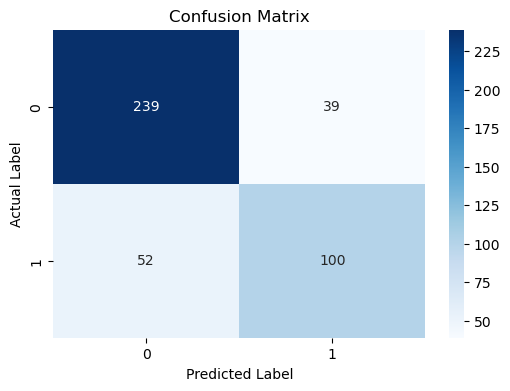

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Model Accuracy on Cross-validation:", grid_search.best_score_)

# Use the best model for final evaluation
best_model = grid_search.best_estimator_
final_accuracy = best_model.score(X_test, y_test)
print(f"Final Model Accuracy: {final_accuracy:.2f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Model Accuracy on Cross-validation: 0.7905891924876263
Final Model Accuracy: 0.79


In [18]:
import joblib

# Save the best model
joblib.dump(best_model, "alzheimers_prediction_model.pkl")

# Save model performance results
optimization_results = pd.DataFrame(grid_search.cv_results_)
optimization_results.to_csv("model_optimization_results.csv", index=False)

print("Model and optimization results saved.")

Model and optimization results saved.


In [20]:
# Create a DataFrame with actual vs predicted diagnosis
predictions_df = pd.DataFrame({
    "PatientID": df.loc[y_test.index, 'PatientID'].values,  # Match Patient IDs correctly
    "Actual_Diagnosis": y_test.values,
    "Predicted_Diagnosis": y_pred
})

# Save to CSV for Tableau visualization
predictions_df.to_csv("alzheimers_predictions.csv", index=False)
print("Predictions saved for Tableau visualization.")

Predictions saved for Tableau visualization.


In [21]:
# Extract feature importance from the best model
feature_importance = pd.DataFrame({
    "Feature": selected_features,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Save feature importance for Tableau
feature_importance.to_csv("alzheimers_feature_importance.csv", index=False)
print("Feature importance saved for Tableau visualization.")

Feature importance saved for Tableau visualization.


In [22]:
# Select relevant patient demographic information
demographics_df = df[['PatientID', 'Age', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 
                      'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges',
                      'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']]

# Save for Tableau
demographics_df.to_csv("alzheimers_patient_data.csv", index=False)
print("Patient data saved for Tableau visualization.")

Patient data saved for Tableau visualization.
